# 📘 ENTREGA FINAL

**Nombre del alumno:** Nancy M. Montenovo

**Datasets:** `ventas.csv`, `clientes.csv`, `marketing.csv` (en Drive).

### Mapeo a la Rúbrica
###Etapa 1: Recopilación y Preparación de Datos
1. Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.
2. Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames.
3. Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.
###Etapa 2: Preprocesamiento y Limpieza de Datos
1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.
2. Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.
3. Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.
4. Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.
###Etapa 3: Análisis de Datos
1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.
2. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.
3. Correlación: Evaluar la relación entre diferentes variables (por ejemplo, precio y cantidad vendida) y mostrar los resultados en un gráfico.
###Etapa 4: Visualización de Datos
1. Visualización con Matplotlib: Crear gráficos básicos (líneas, barras, dispersión)
2. Visualización Avanzada con Seaborn: Desarrollar visualizaciones estadísticas avanzadas, utilizando paletas y estilos para mejorar la presentación.
4. Presentación Final: Preparar una presentación que resuma los hallazgos, insights y visualizaciones generadas a lo largo del proyecto.



##**Definición del uso de cada dataset dentro del proyecto**
###**Ventas**
####ventas: dataset original
####ventas_clean: dataset original después de limpiar datos
####ventas_perf: dataset de ventas_clean con el campo ingreso que es precio*cantidad de cada factura
####resumen_prod: dataset de ventas_perf agrupado por producto y sumado el ingreso de cada venta = ingreso_total
####p80_ingresos: es el valor del percentil al 80, de resumen_prod
####ventas_top: el detaset de resumen_prod, que tiene productos agrupados, pero solo me quedo con los productos mas vendidos (top del 20%)
####ventas_cat: el dataset de ventas_perf que se copio y se llama ventas_cat
####resumen_cat: del dataset de ventas_perf agrupo por categoria de producto y sumo ingreso_total
###**Clientes**
####clientes: dataset original
####clientes_clean: dataset original después de limpiar datos
###**Marketing**
####marketing: dataset original
#### marketing_clean: dataset original después de limpiar datos

# 🧩 Etapa 1: Recopilación y Preparación de Datos
**Objetivo:** Demostrar habilidades en Python, familiaridad con el entorno de trabajo y conocimientos básicos sobre manipulación de datos.

##1️⃣ Carga de datos

**Etapa inicial**

*   Cargar los datasets como DataFrames usando pandas.
*   Uso de pd.read_csv() para cargar los archivos CSV.
*   Verificación de la ruta correcta
*   Revisión de las primeras filas con .head().



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Montar la unidad
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargar los archivos csv que se encuentren en la carpeta datasets
import os
os.listdir("/content/drive/MyDrive/datasets")

['marketing.csv',
 'clientes.csv',
 'ventas.csv',
 'ventas_clean.gsheet',
 'marketing_clean_NM.csv',
 'clientes_clean_NM.csv',
 'ventas_clean_NM.csv',
 'clientes_clean.csv',
 'ventas_clean.csv',
 'marketing_clean.csv']

In [ ]:
# Definimos las rutas de los datasets.
# Aquí dejamos rutas relativas para que sea fácil reemplazarlas si cambia la ubicación.
ruta_ventas = "/content/drive/MyDrive/datasets/ventas.csv"
ruta_clientes = "/content/drive/MyDrive/datasets/clientes.csv"
ruta_marketing = "/content/drive/MyDrive/datasets/marketing.csv"

# Cargamos los CSV como DataFrames.
ventas = pd.read_csv(ruta_ventas)
clientes = pd.read_csv(ruta_clientes)
marketing = pd.read_csv(ruta_marketing)

# Validamos formas para comprobar que se cargaron correctamente.
print("ventas.shape ->", ventas.shape)
print("clientes.shape ->", clientes.shape)
print("marketing.shape ->", marketing.shape)

# Mostramos las primeras filas de cada dataset para corroborar estructura de columnas.
display(ventas.head(3))
display(clientes.head(3))
display(marketing.head(3))

ventas.shape -> (3035, 6)
clientes.shape -> (567, 5)
marketing.shape -> (90, 6)


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024


##2️⃣ Análisis exploratorio inicial

*   Análisis exploratorio inicial de los DataFrames usando métodos como .info(), .describe(), .shape y .columns. dtypes.
> Esto permite entender la estructura y el contenido de los datos.
> Se incluyen comentarios sobre los resultados obtenidos inicialmente.


In [ ]:
# ================================================================
# f FUNCIÓN PARA HACER ANALISIS EXPLORATORIO DE LOS DIFERENTES DF
# ================================================================
# Esta función analiza un DataFrame existente (df) y muestra:
# 1️⃣ La cantidad de filas y columnas
# 2️⃣ El nombre de las columnas
# 3️⃣ El tipo de dato de cada columna
# 4️⃣ El total de valores nulos por columna.
# 5️⃣ Visualización de los primeros 5 registros

def eda(df, nombre):
    print(f"=== {nombre} ===")
    print("Shape: Indica Cant Filas y Columnas:", df.shape) #cant de filas y col
    print("-"*100)
    print("Nombre de columnas del df:", list(df.columns)) #nombre de las columnas
    print("-"*100)
    print("Tipos de datos:") #tipos de datos
    print(df.dtypes)
    print("-"*100)
    print("\nNulos por columna:")
    print(df.isna().sum())  #cant de nulos por columnas
    print("-"*100)
    print("\nPrimeras 5 filas:")
    display(df.head(5)) #visualizar las primeras 5 filas
    print("-"*100)
    print("\nDescribe (numérico):")
    display(df.describe(include='number'))
    print("-"*100)

In [ ]:
#se llama a la función "eda" para validar el df "Ventas"
eda(ventas, "VENTAS (inicial)")

=== VENTAS (inicial) ===
Shape: Indica Cant Filas y Columnas: (3035, 6)
----------------------------------------------------------------------------------------------------
Nombre de columnas del df: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
----------------------------------------------------------------------------------------------------
Tipos de datos:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object
----------------------------------------------------------------------------------------------------

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64
----------------------------------------------------------------------------------------------------

Primeras 5 filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


----------------------------------------------------------------------------------------------------

Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------


####Como resultado de la exploración del df **Ventas**, se puede concluir que:


*   Está compuesto de 3035 filas y 6 columnas
*   Las columnas producto, precio, fecha_venta y categoria son del tipo object y la cantidad tipo float64
*   Hay dos elementos nulos en las columnas precio y cantidad
*   El precio al tener el valor $ no lo está mostrando como valor numérico




In [ ]:
#se llama a la función "eda" para validar el df "clientes"
eda(clientes, "CLIENTES (inicial)")

=== CLIENTES (inicial) ===
Shape: Indica Cant Filas y Columnas: (567, 5)
----------------------------------------------------------------------------------------------------
Nombre de columnas del df: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
----------------------------------------------------------------------------------------------------
Tipos de datos:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
----------------------------------------------------------------------------------------------------

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64
----------------------------------------------------------------------------------------------------

Primeras 5 filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


----------------------------------------------------------------------------------------------------

Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------


####Como resultado de la exploración del df **Clientes**, se puede concluir que:

* Está compuesto de 567 filas y 5 columnas
* Las columnas nombre y ciudad son del tipo object, edad tipo entero e ingresos float64.
* No existen elementos nulos

In [ ]:
#se llama a la función "eda" para validar el df "marketing"
eda(marketing, "MARKETING (inicial)")

=== MARKETING (inicial) ===
Shape: Indica Cant Filas y Columnas: (90, 6)
----------------------------------------------------------------------------------------------------
Nombre de columnas del df: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
----------------------------------------------------------------------------------------------------
Tipos de datos:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object
----------------------------------------------------------------------------------------------------

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64
----------------------------------------------------------------------------------------------------

Primeras 5 filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


----------------------------------------------------------------------------------------------------

Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------


####Como resultado de la exploración del df  **marketing**, se puede concluir que:

* Está compuesto de 90 filas y 6 columnas
* Las columnas producto, canal, fecha_inicio y fecha_fin son del tipo object, y costo tipo float64
* No existen elementos nulos
* Se deberán modificar las fechas a datatime

## 3️⃣ Calidad de los datos

* Identificar valores nulos y duplicados en los conjuntos de datos.
> Sugerencia: usar .isna().sum() y .duplicated().sum().
> Documentar las observaciones con print() o comentarios.

In [ ]:
# ============================================
# f FUNCIÓN DE CONTROL DE CALIDAD DE DATOS
# ============================================
# Esta función analiza un DataFrame existente (df) y muestra:
# 1️⃣ La cantidad de valores nulos por columna.
# 2️⃣ El total de filas completamente duplicadas.
# 3️⃣ Si se especifica una columna clave, los valores más repetidos de esa clave.

def calidad(df, nombre, clave=None):
    """
    Analiza la calidad del DataFrame:
      - Muestra cantidad de nulos por columna.
      - Cuenta filas duplicadas completas.
      - Si se indica una clave, muestra los valores duplicados más frecuentes.
    Parámetros:
      df: DataFrame de pandas que se analizará.
      nombre: texto descriptivo del DataFrame (ejemplo: 'VENTAS').
      clave: (opcional) nombre de la columna para buscar duplicados específicos.
    """

    # -------------------------------------------------
    # Mostrar título descriptivo con el nombre del DF
    # -------------------------------------------------
    print(f"### {nombre}")

    # -------------------------------------------------
    # Mostrar cantidad de valores nulos por columna
    # -------------------------------------------------
    # df.isna() devuelve un DataFrame booleano con True donde hay NaN.
    # .sum() cuenta los True (o sea, los nulos) por columna.
    # .to_frame("nulos") convierte el resultado en un DataFrame con una columna llamada 'nulos'.
    display(df.isna().sum().to_frame("nulos"))

    # -------------------------------------------------
    # Contar filas duplicadas completas
    # -------------------------------------------------
    # df.duplicated(keep=False) marca como True todas las filas que tienen otra igual.
    # keep=False significa que marca todas las copias, no solo una.
    # .sum() cuenta cuántas filas están repetidas.
    dup_rows = df.duplicated(keep=False).sum()
    print("Filas duplicadas (exactas):", dup_rows)

    # -------------------------------------------------
    # Si se especificó una columna clave válida, analizar duplicados por esa columna
    # -------------------------------------------------
    # if clave analiza que clave no sea None
    # and (y)
    if clave and clave in df.columns:
    # clave in df.columns-- >que clave sea una columna existente dentro de las columnas del dataframe
    # si no le paso ninguna columna no va a querer encontrar duplicados por columna
    # y si me equivoco y le paso una columna que no existe en el dataframe, tampoco ingresara al if.
        # Contar cuántas filas tienen valores repetidos en esa columna
        dup_key = df[clave].duplicated(keep=False).sum()
        print(f"Duplicados por clave '{clave}':", dup_key)

        # Si existen duplicados, mostrar cuáles son los valores más repetidos
        if dup_key > 0:
            # Filtrar filas donde esa clave esté duplicada
            # df[clave].duplicated(keep=False) devuelve True donde el valor se repite
            duplicados_ordenados = (
                df[df[clave].duplicated(keep=False)][clave]
                .value_counts()                # Cuenta cuántas veces aparece cada valor
                .sort_values(ascending=False)   # Ordena de mayor a menor (más duplicados arriba)
            )

            print("\n🔁 Top valores duplicados más frecuentes:")
            # Mostrar solo los primeros 10 (los más repetidos)
            display(duplicados_ordenados.head(10))
        else:
            print(f"No se encontraron duplicados en la clave '{clave}'.")
    else:
        # Si la clave no fue pasada o no existe en el DataFrame
        if clave:
            print(f"La clave '{clave}' no existe en el DataFrame.")
        else:
            print("No se indicó una clave para analizar duplicados por columna.")
#fin de def calidad

In [ ]:
# se llama a la función "calidad" para analizar nulos, duplicados en el df **Ventas**
calidad(ventas, "VENTAS", clave="id_venta")

### VENTAS


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 70
Duplicados por clave 'id_venta': 70

🔁 Top valores duplicados más frecuentes:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2


####Como resultado de la exploración del df  **ventas**, se puede concluir que:

* Existen 2 nulos en las columnas precio y cantidad
* Existen 70 filas duplicadas
* Al buscar por **clave** id_venta también devuelve 70 registros duplicados
* 2 es la cantidad de veces que mayor se repite un registro

**Requiere llevar a cabo limpieza de datos**

In [ ]:
# se llama a la función "calidad" para analizar nulos, duplicados en el df **Clientes**
calidad(clientes, "CLIENTES", clave="id_cliente")

### CLIENTES


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_cliente': 0
No se encontraron duplicados en la clave 'id_cliente'.


####Como resultado de la exploración del df  **clientes**, se puede concluir que:

* No existen nulos en el df
* No existen filas duplicadas
* No existen filas duplicadas por clave id_cliente

**No se debe llevar a cabo limpieza de datos**

In [ ]:
# se llama a la función "calidad" para analizar nulos, duplicados en el df **Marketing**
calidad(marketing, "MARKETING", clave="id_campanha")

### MARKETING


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_campanha': 0
No se encontraron duplicados en la clave 'id_campanha'.


####Como resultado de la exploración del df  **marketing**, se puede concluir que:

* No existen nulos
* No existen filas duplicadas
* No existen filas duplicadas al buscar por clave id_campanha

**No se debe llevar a cabo limpieza de datos**

# 🧹 Etapa 2: Preprocesamiento y Limpieza de Datos
**Objetivo:** Demostrar conocimiento de las técnicas de limpieza y transformación de datos.

## 1️⃣ Limpieza de datos
* Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados.
* Sugerencia: aplicar .drop_duplicates(), .str.strip(), .str.replace() según el caso.
* Documentar el proceso y los resultados.

In [ ]:
# ============================================
# f LIMPIEZA Y NORMALIZACIÓN DE LOS DATASETS
# ============================================
# Creación de una función para hacer limpieza y normalización de los DataFrames:
#   ventas, clientes, marketing
# Pasos:
# Eliminar duplicados.
# Normalizar **texto** en columnas `object` (trim + capitalización simple).
# Convertir fechas a fechas reales
# Convertir `precio` y `cantidad` a numéricos si existen.
# Guardar CSV limpios.
# ============================================
# -------------------------------------------------
# 1️⃣ Crear copias independientes para no modificar los df originales
# -------------------------------------------------
ventas_clean = ventas.copy() #el nuevo df se guarda en ventas_clean
clientes_clean = clientes.copy() #el nuevo df se guarda en clientes_clean
marketing_clean = marketing.copy() #el nuevo df se guarda en marketing_clean

# -------------------------------------------------
# 2️⃣ Eliminar filas completamente duplicadas
# -------------------------------------------------
ventas_clean = ventas_clean.drop_duplicates()
clientes_clean = clientes_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()

In [ ]:
#se llama a la función "calidad" para análisis de ventas_clean
calidad(ventas_clean, "VENTAS CLEAN", clave="id_venta")
print ("shape:",ventas_clean.shape)

### VENTAS CLEAN


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_venta': 0
No se encontraron duplicados en la clave 'id_venta'.
shape: (3000, 6)


####Como resultado de la limpieza del df  **ventas_clean**, se puede concluir que:

* Los elementos nulos persisten ya que no se ha aplicado ninguna operación sobre los mismos
* Se removieron 35 filas duplicadas
* No existen filas duplicadas al buscar por clave id_venta
* El nuevo df ventas_clean contiene 3000 filas y 6 columnas


In [ ]:
#se llama a la función "calidad" para hacer análisis de clientes_clean
#Esto se realiza a modo ilustrativo, ya que se ha mencionado anteriormente  que no requiere limpieza.
calidad(clientes_clean, "CLIENTES CLEAN", clave="id_cliente")
print ("shape:",clientes_clean.shape)

### CLIENTES CLEAN


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_cliente': 0
No se encontraron duplicados en la clave 'id_cliente'.
shape: (567, 5)


####Como resultado de la limpieza del df clientes_clean, se puede concluir que:

* El df clientes_clean no sufre cambios, ya que no contenía duplicados.

In [ ]:
#se llama a la función "calidad" para hacer análisis de marketing_clean
#Esto se realiza a modo ilustrativo, ya que se ha mencionado anteriormente  que no requiere limpieza.
calidad(marketing_clean, "MARKETING CLEAN", clave="id_campanha")
print ("shape:",marketing_clean.shape)

### MARKETING CLEAN


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_campanha': 0
No se encontraron duplicados en la clave 'id_campanha'.
shape: (90, 6)


####Como resultado de la limpieza del df marketing_clean, se puede concluir que:

* El df marketing_clean no sufre cambios, ya que no contenía duplicados.

In [ ]:
# -------------------------------------------------
# 3️⃣f Función para limpiar texto en columnas tipo string
# -------------------------------------------------
def normalizar_texto(df):
    for col in df.select_dtypes(include="object").columns:
        # Se agrupan las operaciones entre paréntesis () para escribirlas en varias líneas
        # Python evalúa todo el bloque como una única expresión.
        df[col] = (
            df[col]
            .astype(str)                              # Convierte cualquier tipo a string
            # .astype(str)  → convierte todo a texto; no tiene parámetros adicionales.
            .str.strip()                               # Elimina espacios al inicio y final
            # .str.strip() no necesita argumentos; borra espacios en blanco por defecto.
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            # .str.replace(patron, reemplazo, regex=True)
            #   patron: expresión regular que busca caracteres invisibles (\u200b, tabulaciones, saltos)
            #   reemplazo: ""  → los elimina
            #   regex=True indica que 'patron' es una expresión regular.
            .str.replace(" +", " ", regex=True)
            # reemplaza "uno o más espacios consecutivos" por un solo espacio
            .str.upper()       # Convierte a mayusculas: "juan pérez" → "JUAN  PÉREZ"
        )
        #df_transformado=df[col].astype(str)
        #df_transformado=df_transformado.str.strip()
        #df_transformado=df_transformado.str.replace(r"[\u200b\t\r\n]", "", regex=True)
        #df_transformado=df_transformado.str.replace(" +", " ", regex=True)
        #df_transformado=df_transformado.str.title()
        #df[col]=df_transformado

        #df[col] = df[col].astype(str).str.strip().str.replace(r"[\u200b\t\r\n]", "", regex=True).str.replace(" +", " ", regex=True).str.title()
    return df

In [ ]:
## -------------------------------------------------
# 4️⃣ f Función para Normalizar Fechas
# -------------------------------------------------
#Esta función toma un DataFrame como entrada y busca columnas que contengan la palabra "fecha" en su nombre
# (ignorando mayúsculas y minúsculas). Para cada columna encontrada, intenta convertirla al formato `datetime` de pandas,
#manejando errores (`errors="coerce"`) y asumiendo que el día precede al mes (`dayfirst=True`).


def normalizar_fechas(df):
    """
    Normaliza las columnas de fecha en un DataFrame.

    Convierte cualquier columna cuyo nombre contenga 'fecha' a tipo datetime,
    maneja errores de conversión y asume el formato 'DD/MM/YYYY'.

    Args:
        df (pd.DataFrame): El DataFrame a procesar.

    Returns:
        pd.DataFrame: El DataFrame con las columnas de fecha normalizadas.
    """
    for col in df.columns:
        if "fecha" in col.lower():  # detecta columnas con la palabra "fecha"
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)
            print(f"Columna '{col}' normalizada a datetime.")
    return df


###Aplicar la función normalizar_fechas a los DataFrames

In [ ]:
### normalizar fecha en ventas_clean
print("Normalizando fechas para ventas_clean...")
ventas_clean = normalizar_fechas(ventas_clean)
print("Tipos de datos de ventas_clean después de normalizar:")
display(ventas_clean.dtypes)
display(ventas_clean.head())


Normalizando fechas para ventas_clean...
Columna 'fecha_venta' normalizada a datetime.
Tipos de datos de ventas_clean después de normalizar:


,0
id_venta,int64
producto,object
precio,object
cantidad,float64
fecha_venta,datetime64[ns]
categoria,object


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,2024-01-02,Decoración
1,811,Lámpara de mesa,$105.10,5.0,2024-01-02,Decoración
2,1156,Secadora,$97.96,3.0,2024-01-02,Electrodomésticos
3,1372,Heladera,$114.35,8.0,2024-01-02,Electrodomésticos
4,1546,Secadora,$106.21,4.0,2024-01-02,Electrodomésticos


####Como resultado de la normalización del df ventas_clean, se puede concluir que:

* El campo fecha_venta se visualiza como un campo fecha, y no de tipo objeto

In [ ]:
### normalizar fecha en clientes_clean
#no existe ningún campo fecha, se deja a modo ilustrativo
print("\nNormalizando fechas para clientes_clean...")
clientes_clean = normalizar_fechas(clientes_clean)
print("Tipos de datos de clientes_clean después de normalizar:")
display(clientes_clean.dtypes)
display(clientes_clean.head())


Normalizando fechas para clientes_clean...
Tipos de datos de clientes_clean después de normalizar:


,0
id_cliente,int64
nombre,object
edad,int64
ciudad,object
ingresos,float64


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


####Como resultado de la normalización de fechas del df clientes_clean, se puede concluir que:

* No sufre cambios, ya que no existe ningún campo fecha

In [ ]:
### normalizar fecha en marketing_clean
print("\nNormalizando fechas para marketing_clean...")
marketing_clean = normalizar_fechas(marketing_clean)
print("Tipos de datos de marketing_clean después de normalizar:")
display(marketing_clean.dtypes)
display(marketing_clean.head())


Normalizando fechas para marketing_clean...
Columna 'fecha_inicio' normalizada a datetime.
Columna 'fecha_fin' normalizada a datetime.
Tipos de datos de marketing_clean después de normalizar:


,0
id_campanha,int64
producto,object
canal,object
costo,float64
fecha_inicio,datetime64[ns]
fecha_fin,datetime64[ns]


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05


####Como resultado de la normalización de fechas del df marketing_clean, se puede concluir que:

* Se visualizan como campos fechas, fecha inicio y fecha fin, que anteriormente estabab como objeto.

###Aplicar la función normalizar_texto a los DataFrames

In [ ]:
# -------------------------------------------------
# Aplicar la normalización de texto a "Ventas Clean" llamando a la fucnión  "normalizar_texto"
# -------------------------------------------------
ventas_clean = normalizar_texto(ventas_clean)
print('Ventas Clean luego de la normalización')
display(ventas_clean.head(10))
print()
print(ventas_clean.dtypes)


Ventas Clean luego de la normalización


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,CUADRO DECORATIVO,$69.94,5.0,2024-01-02,DECORACIÓN
1,811,LÁMPARA DE MESA,$105.10,5.0,2024-01-02,DECORACIÓN
2,1156,SECADORA,$97.96,3.0,2024-01-02,ELECTRODOMÉSTICOS
3,1372,HELADERA,$114.35,8.0,2024-01-02,ELECTRODOMÉSTICOS
4,1546,SECADORA,$106.21,4.0,2024-01-02,ELECTRODOMÉSTICOS
5,1697,HORNO ELÉCTRICO,$35.35,9.0,2024-01-02,ELECTRODOMÉSTICOS
6,1710,PLANCHA DE VAPOR,$65.43,2.0,2024-01-02,ELECTRODOMÉSTICOS
7,2959,PROYECTOR,$88.17,9.0,2024-01-02,ELECTRÓNICA
8,318,RINCÓN DE PLANTAS,$79.86,11.0,2024-01-03,DECORACIÓN
9,419,CANDELABRO,$66.11,8.0,2024-01-03,DECORACIÓN



id_venta                int64
producto               object
precio                 object
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


Como resultado de la normalización del df ventas_clean, se puede concluir que:

* Los valores de las columnas Producto y Categoria  se transforman a mayúsculas

In [ ]:
# -------------------------------------------------
#  Aplicar la normalización de texto para "Clientes Clean" llamando a la fucnión  "normalizar_texto"
# -------------------------------------------------
clientes_clean = normalizar_texto(clientes_clean)
print('Clientes Clean luego de la normalización')
display(clientes_clean.head(10))
print()
print(clientes_clean.dtypes)

Clientes Clean luego de la normalización


,id_cliente,nombre,edad,ciudad,ingresos
0,1,ALOYSIA SCREASE,44,MAR DEL PLATA,42294.68
1,2,KRISTINA SCAPLEHORN,25,POSADAS,24735.04
2,3,FILIP CASTAGNE,50,RESISTENCIA,35744.85
3,4,LIUKA LUARD,39,BAHÍA BLANCA,27647.96
4,5,DORE COCKSHTT,28,ROSARIO,28245.65
5,6,PATRICK EARLE,34,SAN MIGUEL DE TUCUMÁN,62763.31
6,7,ETAN DEETH,35,RESISTENCIA,37489.71
7,8,BOOTH BIELFELT,40,CÓRDOBA,35255.94
8,9,SHIRL LABONE,29,ROSARIO,27592.08
9,10,ANDY MENDENHALL,52,ROSARIO,37153.94



id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object


Como resultado de la normalización del df clientes_clean, se puede concluir que:

* Los valores de las columnas nombre y ciudad  se transforman a mayúsculas

In [ ]:
# -------------------------------------------------
#  Aplicar la normalización de texto a "Marketing Clean" llamando a la fucnión  "normalizar_texto"
# -------------------------------------------------
marketing_clean = normalizar_texto(marketing_clean)
print('Marketing Clean luego de la normalización')
display(marketing_clean.head(10))
print()
print(marketing_clean.dtypes)

Marketing Clean luego de la normalización


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,ADORNO DE PARED,TV,4.81,2024-03-20,2024-05-03
1,12,TABLET,RRSS,3.40,2024-03-26,2024-05-13
2,32,LÁMPARA DE MESA,EMAIL,5.54,2024-03-28,2024-04-20
3,21,SMARTPHONE,RRSS,6.37,2024-03-29,2024-05-16
4,58,ALFOMBRA,EMAIL,4.25,2024-03-31,2024-05-05
5,85,SMARTWATCH,TV,5.07,2024-04-01,2024-05-05
6,36,PLANCHA DE VAPOR,EMAIL,5.41,2024-04-02,2024-06-01
7,57,BATIDORA,EMAIL,4.48,2024-04-10,2024-06-08
8,44,ADORNO DE PARED,EMAIL,5.08,2024-04-13,2024-05-10
9,84,PARLANTES BLUETOOTH,TV,4.42,2024-04-17,2024-05-05



id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


Como resultado de la normalización del df marketing_clean, se puede concluir que:

* Los valores de las columnas Producto y canal  se transforman a mayúsculas

In [ ]:
# -------------------------------------------------
# 5️⃣ Normalizar valores numéricos en el df "Ventas Clean"
# -------------------------------------------------
# 🏷️ Campo "precio"
if "precio" in ventas_clean.columns:
    # Se usa nuevamente agrupación con () para encadenar métodos y mantener legibilidad
    ventas_clean["precio"] = (
        ventas_clean["precio"]
        .astype(str)                        # Convierte todo a texto
        .str.replace("$", "", regex=False)  # Elimina el símbolo $
        #   "$" → texto literal a reemplazar
        #   ""  → nuevo valor (vacío)
        #   regex=False → interpreta "$" literalmente, no como expresión regular
        .str.replace(",", "", regex=False)  # Elimina comas de miles 1,000  1000
        .str.strip()                        # Quita espacios sobrantes
    )
    ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors="coerce")
    # pd.to_numeric convierte texto a número (float o int)
    # Parámetros:
    #   errors="coerce" → reemplaza valores no convertibles con NaN
display(ventas_clean.head(5))
print()
print("Types Ventas Clean")
print(ventas_clean.dtypes)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,CUADRO DECORATIVO,69.94,5.0,2024-01-02,DECORACIÓN
1,811,LÁMPARA DE MESA,105.10,5.0,2024-01-02,DECORACIÓN
2,1156,SECADORA,97.96,3.0,2024-01-02,ELECTRODOMÉSTICOS
3,1372,HELADERA,114.35,8.0,2024-01-02,ELECTRODOMÉSTICOS
4,1546,SECADORA,106.21,4.0,2024-01-02,ELECTRODOMÉSTICOS



Types Ventas Clean
id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


Observación: Se visualiza la transformación del campo **Precio a float**, antes era tipo: object. Se le quita el símbolo peso

In [ ]:
# 6️⃣Transformación del Campo "cantidad" a Int
if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = pd.to_numeric(
        ventas_clean["cantidad"], errors="coerce"
    ).astype("Int64")
    # .astype("Int64") usa el tipo entero de pandas que permite valores nulos (NaN)
display(ventas_clean.head(5))
print()
print("Types Ventas Clean")
print(ventas_clean.dtypes)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS



Types Ventas Clean
id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


**Resultado**:

* Se visualiza la transformación de la columna **cantidad a Int**, antes era float
* No se llevan a cabo transformaciones sobre clientes_clean y marketing_clean porque los campos numéricos están correctos (edad tipo Int, ingresos y costo tipo float64)

In [ ]:
# -------------------------------------------------
# 7️⃣ Guardar los DataFrames limpios como CSV
# -------------------------------------------------
print('----- Ventas Clean -----')
display(ventas_clean.head())
print('----- Info  -----')
ventas_clean.info()
print(ventas_clean.select_dtypes(include="object").columns)
ventas_clean.to_csv("/content/drive/MyDrive/datasets/ventas_clean_NM.csv", index=False)
print()
print('--------Clientes Clean --------')
display(clientes_clean.head())
print('----- Info  -----')
clientes_clean.info()
print(clientes_clean.select_dtypes(include="object").columns)
clientes_clean.to_csv("/content/drive/MyDrive/datasets/clientes_clean_NM.csv", index=False)
print()
print('------Marketing Clean --------')
display(marketing_clean.head())
print('----- Info  -----')
marketing_clean.info()
print(marketing_clean.select_dtypes(include="object").columns)
marketing_clean.to_csv("/content/drive/MyDrive/datasets/marketing_clean_NM.csv", index=False)
print()
print("✅ Archivos guardados: ventas_clean_NM.csv, clientes_clean_NM.csv, marketing_clean_NM.csv")

----- Ventas Clean -----


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS


----- Info  -----
<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 167.0+ KB
Index(['producto', 'categoria'], dtype='object')

--------Clientes Clean --------


,id_cliente,nombre,edad,ciudad,ingresos
0,1,ALOYSIA SCREASE,44,MAR DEL PLATA,42294.68
1,2,KRISTINA SCAPLEHORN,25,POSADAS,24735.04
2,3,FILIP CASTAGNE,50,RESISTENCIA,35744.85
3,4,LIUKA LUARD,39,BAHÍA BLANCA,27647.96
4,5,DORE COCKSHTT,28,ROSARIO,28245.65


----- Info  -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB
Index(['nombre', 'ciudad'], dtype='object')

------Marketing Clean --------


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,ADORNO DE PARED,TV,4.81,2024-03-20,2024-05-03
1,12,TABLET,RRSS,3.40,2024-03-26,2024-05-13
2,32,LÁMPARA DE MESA,EMAIL,5.54,2024-03-28,2024-04-20
3,21,SMARTPHONE,RRSS,6.37,2024-03-29,2024-05-16
4,58,ALFOMBRA,EMAIL,4.25,2024-03-31,2024-05-05


----- Info  -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB
Index(['producto', 'canal'], dtype='object')

✅ Archivos guardados: ventas_clean_NM.csv, clientes_clean_NM.csv, marketing_clean_NM.csv


###Reporte Global luego de la limpieza de datos

In [ ]:
# ============================================
# 📊 f REPORTE GLOBAL DE CALIDAD DE DATOS
# ============================================
# Esta función lee los tres DataFrames limpios (o los recibe en memoria)
# y muestra un resumen comparativo de nulos, duplicados y tipos de datos.
# ============================================

def reporte_calidad_global(dfs, nombres):
    """
    Crea un resumen de calidad de varios DataFrames.

    Parámetros:
      dfs: lista de DataFrames (por ejemplo [ventas_clean, clientes_clean, marketing_clean])
      nombres: lista de nombres correspondientes (["VENTAS", "CLIENTES", "MARKETING"])
    """
    resumen = []
    #zip-->es una función incorporada de Python que une elementos de dos (o más) iterables
    # —por ejemplo, listas, tuplas o cualquier objeto iterable— en pares ordenados.
    for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()                    # Total de valores nulos, no por columnas sino total, por eso el doble sum
        duplicados = df.duplicated(keep=False).sum()     # Total de filas duplicadas
        columnas = len(df.columns)                       # Cantidad de columnas
        filas = len(df)                                  # Cantidad de registros

        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
        })

    reporte = pd.DataFrame(resumen)
    #display(reporte)
    return reporte



In [ ]:
#ejecución de la función de reporte
display('REPORTE GLOBAL, situación de los DF antes y después de la limpieza y transformación de datos')
display(reporte_calidad_global([ventas, clientes, marketing], ["VENTAS Original", "CLIENTES Original", "MARKETING Original"]))
display(reporte_calidad_global([ventas_clean, clientes_clean, marketing_clean],["VENTAS Copia   ", "CLIENTES Copia   ", "MARKETING Copia   "]))

'REPORTE GLOBAL, situación de los DF antes y después de la limpieza y transformación de datos'

,Dataset,Filas,Columnas,Nulos totales,Duplicados
0,VENTAS Original,3035,6,4,70
1,CLIENTES Original,567,5,0,0
2,MARKETING Original,90,6,0,0


,Dataset,Filas,Columnas,Nulos totales,Duplicados
0,VENTAS Copia,3000,6,4,0
1,CLIENTES Copia,567,5,0,0
2,MARKETING Copia,90,6,0,0


###Como resultado de la aplicación de limpieza y normalización de datos:

* Se eliminan los duplicados en el DF Ventas. Los DF de Clientes y Marketing no presentaban duplicados.
* Se visualiza la transformación de las columnas precio y cantidad, del DF Ventas.
* No se realizan tratamientos sobre los nulos, debido a que no influyen en el resultado final.

## 2️⃣ Transformación de datos

* Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.
* Calcular el percentil 80
* Filtrar los productos que superen ese umbral en ventas.
* Quantile(0.8)
* Sugerencia: usar .query() o condiciones con operadores lógicos.


**Transformación de datos (filtrar “alto rendimiento”)**
*Objetivo: construir una tabla de rendimiento por producto y quedarnos sólo con los productos de alto rendimiento.*

Conceptos clave:

* Transformación de datos:
Son operaciones que crean/derivan nuevas columnas (por ejemplo ingreso = precio * cantidad), normalizan formatos (texto/fechas/números) o filtran filas según un criterio.

* Métrica de ingreso:
Para ventas, una métrica típica es ingreso por registro = precio * cantidad. Luego podemos agregar por producto (sumar ingresos y unidades) para medir rendimiento total por producto.

* Agregación:
Es resumir muchas filas en pocas, aplicando funciones como sum(), mean(), count() agrupando por una clave (ej., producto). Ej.: “ingreso total por producto” = suma de todos los ingresos de ese producto.

* Percentil:
El percentil 80 (P80) es un valor tal que el 80% de los datos están por debajo o igual a ese valor y el 20% restante por encima.
Si ingreso_total P80 = 120.000, significa que el 80% de los productos tienen ingreso_total ≤ 120.000 y el 20% ≥ 120.000.

* Alto rendimiento:
aquí lo definimos como top 20% de productos según ingreso_total (>= P80). Es un criterio común cuando no hay umbrales de negocio explícitos. Alternativas válidas: top-K (p. ej. top 50 productos), percentil 75 (P75) o un umbral fijo de negocio (p. ej., “>= $100.000/mes”), o score estandarizado (z-score).

*Plan paso a paso:*
1. Detectar la columna de producto (tolerando distintos nombres: producto, id_producto, sku, articulo…).
2. Calcular ingreso por registro = precio * cantidad.
3. Agregar por producto para obtener métricas (ingreso_total, unidades, precio_promedio, registros).
4. Calcular P80 con quantile(q=0.80).
5. Filtrar productos con ingreso_total >= P80.
6. Ordenar de mayor a menor.

In [ ]:
# ============================================
# TRANSFORMACIÓN: productos de alto rendimiento
# ============================================
# Objetivo:
# - Detectar los productos con mejor desempeño económico (top 20% por ingreso total).
# - Aplicar transformación: calcular ingreso, agregar por producto y filtrar.
# ============================================
#Definición de la función
def encontrar_columna(df, candidatos):
    """
    Busca la primera columna cuyo nombre contenga alguno de los patrones dados.
    - df: DataFrame de pandas.
    - candidatos: lista de patrones (minúsculas).
    """
    # Recorremos todas las columnas del DataFrame
    for c in df.columns:

        # Convertimos el nombre de la columna a minúsculas
        # Esto se hace para comparar sin importar si está escrito con mayúsculas o minúsculas
        nombre = c.lower()

        # Verificamos si alguna palabra (patrón) de la lista 'candidatos'
        # está contenida dentro del nombre de la columna
        # 'any()' devuelve True apenas encuentra una coincidencia
        if any(p in nombre for p in candidatos):
            # Si encontramos una coincidencia, devolvemos el nombre original de la columna
            return c

    # Si termina el bucle y no se encontró ninguna coincidencia, devolvemos None
    return None


In [ ]:
# 1️⃣ Detectar la columna producto
prod_col = encontrar_columna(ventas_clean, ["producto", "id_producto", "sku", "articulo", "artículo"])
if prod_col is None:
    raise ValueError("No se encontró columna de producto. Renombrá una columna a 'producto' o similar.")

print("Nombre de la columna:",prod_col)

Nombre de la columna: producto


In [ ]:
# 2️⃣ Calcular ingreso por registro = precio * cantidad
# ()) es para esciribir en varias filas
ventas_perf = (
    ventas_clean
    .assign( #crea nueva columna
        ingreso = ventas_clean["precio"] * ventas_clean["cantidad"]
        # assign(**nuevas_col): crea nuevas columnas y devuelve una copia del DF.
        # Alternativa: ventas_clean["ingreso"] = ventas_clean["precio"] * ventas_clean["cantidad"]
    )
)
#Visualizar la nueva columna "ingreso" y el cálculo obtenido de las primeras filas
display(ventas_perf.head())

,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN,349.7
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN,525.5
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS,293.88
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS,914.8
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS,424.84


In [ ]:
# 3️⃣ Agregar métricas por producto
resumen_prod = (
    ventas_perf
    # 1) Agrupamos el DataFrame por una o varias columnas clave
    .groupby(
        by=prod_col,    # Columna (str) o lista de columnas (list[str]) que define los grupos.
        dropna=False,   # False → NO descarta filas donde la clave de grupo tenga NaN; crea un grupo para NaN.
        as_index=False, # False → las columnas de agrupación quedan como columnas normales (no pasan al índice).
        observed=False  # Solo aplica si 'prod_col' es Categorical:
                        #   False → incluye categorías NO observadas (posibles pero sin filas);
                        #   True  → solo categorías que aparecen en los datos (más rápido y “compacto”).
    )
    # 2) Agregamos (resumimos) columnas numéricas por cada grupo
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma de 'ingreso' por grupo (skipna=True por defecto).
        unidades=('cantidad', 'sum'),       # Suma de 'cantidad' por grupo.
        precio_promedio=('precio', 'mean'), # Promedio simple de 'precio' por grupo (ignora NaN).
        registros=('ingreso', 'size')       # Número de filas en el grupo (cuenta TODO, incluso NaN).
    )
    # Ordenar resultado por ingreso_total Descending y rendondear el precio_promedio a 2 decimales
    .sort_values(by='ingreso_total', ascending=False)
    .round({'precio_promedio': 2})
)
#Visualizar el resultado
display(resumen_prod)

,producto,ingreso_total,unidades,precio_promedio,registros
19,LÁMPARA DE MESA,82276.38,1112,72.72,176
3,AURICULARES,74175.58,958,76.30,143
20,MICROONDAS,72562.89,912,79.18,135
5,CAFETERA,59607.31,765,79.05,117
9,CUADRO DECORATIVO,54297.6,726,74.58,100
26,SMARTPHONE,54132.44,665,81.40,101
25,SECADORA,52115.45,696,73.34,100
16,JARRÓN DECORATIVO,51130.88,672,74.53,100
4,BATIDORA,50979.2,672,77.54,100
24,RINCÓN DE PLANTAS,50456.45,691,74.82,101


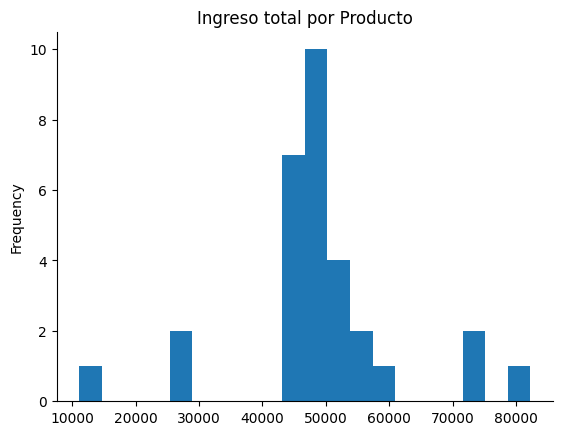

In [ ]:
#Generación de un gráfico de barras con el ingreso total
from matplotlib import pyplot as plt
resumen_prod['ingreso_total'].plot(kind='hist', bins=20, title='Ingreso total por Producto')
plt.gca().spines[['top', 'right',]].set_visible(False)

###**Resumen:**
#### El producto con mayor ingreso total es "LAMPARA DE MESA" con 82.276,38, en segundo lugar están los "AURICULARES" por 74.175,58 y el tercer lugar lo ocupa "MICROONDAS" con $72.562,89

In [ ]:
# 4️⃣ Calcular percentil 80 de ingreso_total
# --------------------------------------------------------
# La función quantile() nos permite obtener el valor de un percentil.
# En este caso, queremos saber el ingreso que separa al 80% de los productos
# con menores ingresos del 20% con mayores ingresos.

p80_ingreso = resumen_prod["ingreso_total"].quantile(
    q=0.80,                # q indica el percentil deseado (0.80 = 80% de los datos por debajo)
    interpolation="linear" # si el percentil no coincide exactamente con un valor real del dataset,
                           # 'linear' interpola entre los dos valores vecinos.
                           # Ejemplo: si el 80% cae entre 4000 y 5000,
                           # calcula un valor proporcional, por ejemplo 4200.
                           # Otros métodos posibles:
                           #  - 'lower': toma el menor de los dos valores (4000)
                           #  - 'higher': toma el mayor (5000)
                           #  - 'nearest': el más cercano al percentil
                           #  - 'midpoint': el punto medio exacto (4500)
)

# En resumen:
# - quantile calcula el valor límite de un percentil.
# - q define qué percentil queremos.
# - interpolation define cómo se calcula cuando el valor no está exactamente en los datos.
# El resultado (p80_ingreso) es el ingreso total que marca el límite superior del 80% de los productos.

#se muestra el percentil
print("El valor del percentil es: ", p80_ingreso)

El valor del percentil es:  52518.848000000005


In [ ]:
# 5️⃣ Filtrar los productos "de alto rendimiento" y ordenarlos
# -------------------------------------------------------------------
# Contexto: `resumen_prod` es un DataFrame con métricas por producto,
# y `p80_ingreso` es el percentil 80 de la columna "ingreso_total".
# Objetivo: quedarnos con los productos cuyo ingreso_total está en el 20% superior (representa el mayor ingreso)
# (ingreso_total >= p80_ingreso) y luego ordenarlos de mayor a menor por ingreso y unidades.
#en una sola fila
#ventas_top = (resumen_prod.query("ingreso_total >= @p80_ingreso",engine="python").sort_values(by=["ingreso_total", "unidades"],ascending=[False, False],na_position="last",ignore_index=True))
ventas_top = (
    resumen_prod
    # ---------------------------------------------------------------
    # .query(expr, *, inplace=False, engine='python'|'numexpr')
    #   - Aplica un filtro usando una expresión estilo SQL-simple.
    #   - `expr` es un string que se evalúa sobre los nombres de las columnas.
    #   - Para usar variables de Python (no columnas), se antepone '@' (ej.: @p80_ingreso).
    #   - NaN en comparaciones (>, >=, ==, etc.) se comportan como False → esas filas no pasan el filtro.
    #   - engine='python': interpreta la expresión con Python puro (compatible siempre).
    #   - engine='numexpr': si está instalado, acelera operaciones numéricas vectorizadas.
    #   - inplace: False (por defecto) devuelve un DF nuevo; True modifica el DF original (menos recomendado en cadenas).
    .query(
        "ingreso_total >= @p80_ingreso",  # expr: filtra filas donde ingreso_total es al menos el umbral del P80
        engine="python"                   # motor de evaluación (usar 'numexpr' si lo tenés y querés performance)
        # Notas de sintaxis de `expr`:
        #   • Operadores lógicos: and / or / not   (también valen &, |, ~ con paréntesis).
        #   • Strings deben ir entre comillas: canal == 'Online'
        #   • Columnas con espacios o caracteres raros: usar `backticks`, ej.: `nombre producto` == 'X'
        #   • Ejemplos:
        #       "ingreso_total >= @p80_ingreso and unidades >= 10"
        #       "`nombre producto`.str.contains('Promo')"
        #       "precio_promedio.between(1000, 3000, inclusive='both')"
    )
    # ---------------------------------------------------------------
    # .sort_values(by, axis=0, ascending=True|[...], inplace=False,
    #              kind='quicksort'|'mergesort'|'heapsort'|'stable',
    #              na_position='last'|'first', ignore_index=False, key=None)
    #   - Ordena por una o varias columnas.
    #   - `by`: str o lista de str con las columnas a ordenar.
    #   - `ascending`: bool o lista de bool (una por cada columna en `by`).
    #   - `na_position`: dónde ubicar NaN ('last' o 'first').
    #   - `ignore_index`: si True, reasigna el índice 0..n-1 en el resultado.
    #   - `kind`: algoritmo de ordenamiento (mergesort es estable si necesitás preservar empates).
    #   - `key`: función que transforma los valores antes de ordenar (p. ej., key=lambda s: s.str.normalize(...)).
    .sort_values(
        by=["ingreso_total", "unidades"],  # primero ordena por ingreso_total, luego desempata por unidades
        ascending=[False, False],          # ambos en orden descendente (mayor → menor)
        na_position="last",                # coloca NaN al final (útil si alguna métrica quedó en NaN)
        ignore_index=True                  # reindexa el resultado secuencialmente (0..n-1)
        # Variantes útiles:
        #   • ascending=True                 # orden ascendente
        #   • ascending=[False, True]        # primero desc, luego asc para el segundo criterio
        #   • kind='mergesort'               # orden estable (respeta el orden de aparición en empates)
        #   • key=lambda s: s.str.lower()    # ordenar texto sin distinción de mayúsculas/minúsculas
    )
)

# Resultado:
# `ventas_top` contiene solo los productos cuyo ingreso_total >= p80_ingreso,
# ordenados de mayor a menor por ingreso_total y, ante empates, por unidades.


In [ ]:
# 6️⃣ Se muestran los resultados de la aplicación del punto anterior
print(f"Columna de producto detectada: {prod_col}")
print(f"Umbral (percentil 80) de ingreso_total: {float(p80_ingreso):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):")
display(ventas_top.head(20))

Columna de producto detectada: producto
Umbral (percentil 80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):


,producto,ingreso_total,unidades,precio_promedio,registros
0,LÁMPARA DE MESA,82276.38,1112,72.72,176
1,AURICULARES,74175.58,958,76.30,143
2,MICROONDAS,72562.89,912,79.18,135
3,CAFETERA,59607.31,765,79.05,117
4,CUADRO DECORATIVO,54297.6,726,74.58,100
5,SMARTPHONE,54132.44,665,81.40,101


###**Resumen:**
#### Como se puede observer 6 de los productos superan el valor porcentual de 52518,85, por tal motivo no se visualizan en el df ventas_top


## 3️⃣ Agregación

**Objetivo**:

*Construir un resumen por categoría de producto con métricas útiles (ingreso total, unidades, cantidad de ventas, ticket promedio).*

* Resumir las ventas por categoría de producto y analizar los ingresos generados.
* Sugerencia: usar .groupby() y .agg() para generar métricas como suma y promedio.

Conceptos clave:

*Agregación: operación que resume muchas filas en menos filas, aplicando funciones (sum, mean, count, etc.) después de agrupar por una clave (aquí, la categoría).

*Categoría de producto: atributo que agrupa productos similares (ej., “Electrónica”, “Hogar”). Puede llamarse categoria, rubro, etc.

*Ticket promedio por venta: ingreso_total / ventas (dónde ventas es el conteo de filas en esa categoría). Indica el importe medio facturado por cada transacción/registro en la categoría.

> Nota: esto no es el “precio promedio” del producto; ese ya se calcula con mean sobre precio.

*Consideraciones: outliers pueden distorsionar promedios; a veces conviene mirar también la mediana (median).

*Plan paso a paso:*
1. Detectar la columna de categoría.
2. Asegurar columna ingreso (si no existe, crearla).
3. groupby(categoría).agg(...) para obtener métricas.
4. Ordenar por ingreso_total.
5. Calcular ticket_promedio_por_venta.

In [ ]:
# Detectar columna de categoría (acepta variantes) invocando a la función "encontrar_columna"
cat_col = encontrar_columna(ventas_clean, ["category","categoria", "categoría", "categoria_producto", "rubro"])
if cat_col is None:
    print("No se encontró columna de categoría (por ej. 'categoria' o 'rubro').")
else:
    print("El nombre de la columna es: ",cat_col)

El nombre de la columna es:  categoria


In [ ]:
display(ventas_clean.head())

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS


La columna ingreso no existe en ventas_clean, por lo que se creará

In [ ]:
# Asegurar columna 'ingreso' (si no existe, crearla)
if "ingreso" not in ventas_clean.columns:
    ventas_cat = ventas_clean.assign(ingreso = ventas_clean["precio"] * ventas_clean["cantidad"])
else:
    ventas_cat = ventas_clean.copy()

display(ventas_cat.head())



,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN,349.7
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN,525.5
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS,293.88
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS,914.8
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS,424.84


In [ ]:
# Agregación por categoría con groupby + agg
resumen_cat = (
    ventas_cat
    .groupby(
        by=cat_col,      # Puede ser string o lista de strings si quisiéramos agrupar por varias columnas.
        dropna=False,    # Mantener grupo NaN (si hay filas sin categoría).
        as_index=False   # Dejar la categoría como columna normal (y no como índice).
        # observed: si cat_col es 'category' y queremos mostrar solo categorías presentes → True.
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma total de ingresos por categoría.
        unidades=('cantidad', 'sum'),       # Unidades totales vendidas en la categoría.
        ventas=('ingreso', 'size'),         # Cantidad de registros/filas (ventas) en la categoría.
        precio_promedio=('precio', 'mean')  # Precio promedio observado en la categoría.
        # Otras funciones útiles: 'median','max','min','std','var','nunique'...
    )
    .sort_values(
        by='ingreso_total', # Ordenar por ingreso total
        ascending=False,    # Descendente: mayores arriba
        na_position='last', # NaN al final
        ignore_index=True   # Reindexar desde 0
    )
    .round({'precio_promedio': 2}) # Round precio_promedio to 2 decimal places
)

display(resumen_cat)

,categoria,ingreso_total,unidades,ventas,precio_promedio
0,ELECTRODOMÉSTICOS,505299.63,6592,1000,76.52
1,ELECTRÓNICA,482577.8,6413,999,75.25
2,DECORACIÓN,479216.09,6490,1001,74.10


In [ ]:
# Ticket promedio por venta = ingreso_total / ventas
resumen_cat = resumen_cat.assign(
    ticket_promedio_por_venta = (resumen_cat['ingreso_total'] / resumen_cat['ventas']).round(2)
    # assign: crea/reescribe columnas. Alternativa: resumen_cat['ticket_promedio_por_venta'] = ...
)

display(resumen_cat)

,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,ELECTRODOMÉSTICOS,505299.63,6592,1000,76.52,505.3
1,ELECTRÓNICA,482577.8,6413,999,75.25,483.06
2,DECORACIÓN,479216.09,6490,1001,74.10,478.74


In [ ]:
#Mostrar los valores obtenidos por categoría
print("Columna de categoría detectada:", cat_col)
print("Resumen por categoría (ordenado por ingreso_total):")
display(resumen_cat.head(20))


Columna de categoría detectada: categoria
Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,ELECTRODOMÉSTICOS,505299.63,6592,1000,76.52,505.3
1,ELECTRÓNICA,482577.8,6413,999,75.25,483.06
2,DECORACIÓN,479216.09,6490,1001,74.10,478.74


##  4️⃣ Integración de datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.
####**Objetivo:**
* Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.
* Sugerencia: usar pd.merge() especificando la clave común entre ambos DataFrames.
* Documentar cualquier observación relevante sobre la combinación de datos.

In [ ]:
#agrupo el df de ventas clean por producto y sum la cantidad por el precio
df_ventas_x_producto = ventas_clean.groupby('producto').agg(
    precio_por_cantidad=('precio', lambda x: (x * ventas_clean.loc[x.index, 'cantidad']).sum())
)

# Ordeno por producto de forma ascendente
df_ventas_x_producto = df_ventas_x_producto.sort_values(by='producto', ascending=True)

# muestro resultado
display(df_ventas_x_producto)

,precio_por_cantidad
producto,
ADORNO DE PARED,48093.49
ALFOMBRA,44773.06
ASPIRADORA,50085.86
AURICULARES,74175.58
BATIDORA,50979.20
CAFETERA,59607.31
CANDELABRO,11128.80
CONSOLA DE VIDEOJUEGOS,46174.41
CORTINAS,44865.03


In [ ]:
#agrupo marketing clean por producto y sumo el costo de las campañas de ese producto

df_marketing_x_producto = marketing_clean.groupby('producto')['costo'].sum().reset_index()
df_marketing_x_producto = df_marketing_x_producto[['producto', 'costo']] # Select only the desired columns
df_marketing_x_producto = df_marketing_x_producto.sort_values(by='producto', ascending=True) # Sort by product ascending
display(df_marketing_x_producto)

,producto,costo
0,ADORNO DE PARED,14.05
1,ALFOMBRA,17.46
2,ASPIRADORA,16.46
3,AURICULARES,15.24
4,BATIDORA,15.28
5,CAFETERA,18.16
6,CANDELABRO,14.65
7,CONSOLA DE VIDEOJUEGOS,12.77
8,CORTINAS,17.36
9,CUADRO DECORATIVO,15.85


In [ ]:
#mergeo el df agrupado por producto con el de marketing agrupado por producto por producto
merged_df = pd.merge(df_ventas_x_producto, df_marketing_x_producto, on='producto')
display(merged_df)

,producto,precio_por_cantidad,costo
0,ADORNO DE PARED,48093.49,14.05
1,ALFOMBRA,44773.06,17.46
2,ASPIRADORA,50085.86,16.46
3,AURICULARES,74175.58,15.24
4,BATIDORA,50979.20,15.28
5,CAFETERA,59607.31,18.16
6,CANDELABRO,11128.80,14.65
7,CONSOLA DE VIDEOJUEGOS,46174.41,12.77
8,CORTINAS,44865.03,17.36
9,CUADRO DECORATIVO,54297.60,15.85


In [ ]:
#obtengo que % me representa el costo sobre el ingreso
merged_df['porcentaje_costo_sobre_ingreso'] = (merged_df['costo'] / merged_df['precio_por_cantidad']) * 100
display(merged_df)

,producto,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,ADORNO DE PARED,48093.49,14.05,0.029214
1,ALFOMBRA,44773.06,17.46,0.038997
2,ASPIRADORA,50085.86,16.46,0.032864
3,AURICULARES,74175.58,15.24,0.020546
4,BATIDORA,50979.20,15.28,0.029973
5,CAFETERA,59607.31,18.16,0.030466
6,CANDELABRO,11128.80,14.65,0.131640
7,CONSOLA DE VIDEOJUEGOS,46174.41,12.77,0.027656
8,CORTINAS,44865.03,17.36,0.038694
9,CUADRO DECORATIVO,54297.60,15.85,0.029191


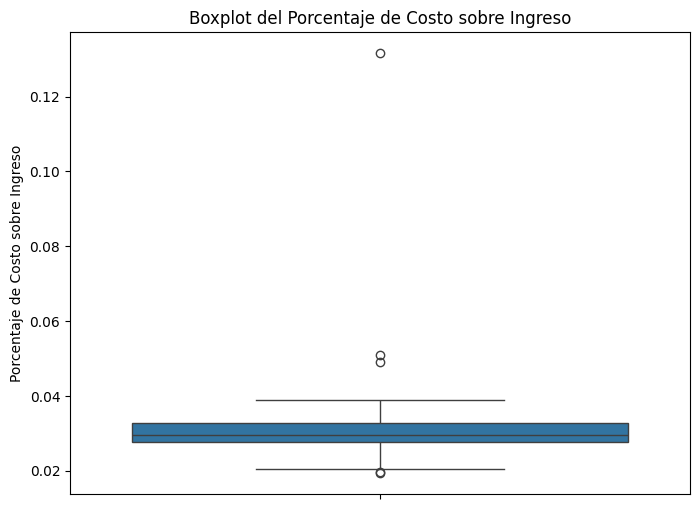

In [ ]:
#Gráfico Boxplot para identificar dispersión y posibles outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df['porcentaje_costo_sobre_ingreso'])
plt.title('Boxplot del Porcentaje de Costo sobre Ingreso')
plt.ylabel('Porcentaje de Costo sobre Ingreso')
plt.show()


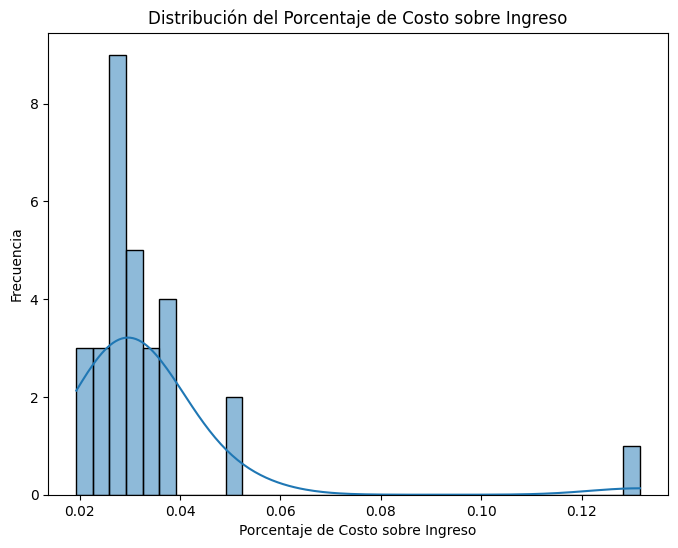

In [ ]:
# Gráfico Histograma para analizar la distribución de % de costo sobre ingresos
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['porcentaje_costo_sobre_ingreso'], kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Frecuencia')
plt.show()

# 🔍: Etapa 3: Análisis de Datos
**Objetivo:** Realizar análisis estadístico y exploratorio sobre los datos procesados.

##1️⃣ Estadística Descriptiva

####**Objetivos:**
* Calcular medidas de tendencia central y dispersión sobre las ventas.
* Presentar los resultados en un informe.


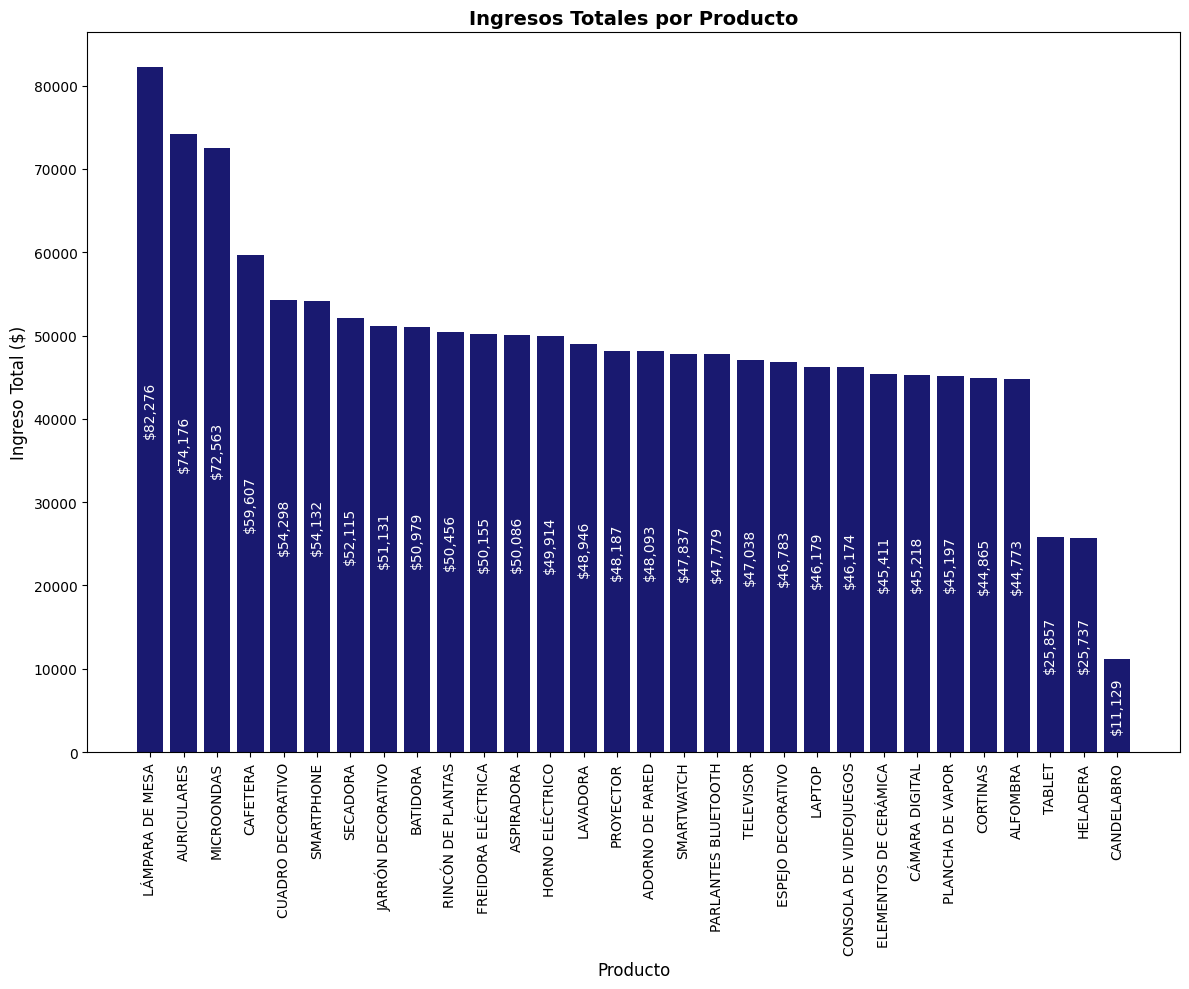

In [ ]:
# Gráfico de barra con los datos del **df resumen_prod**, el cual está agrupado por producto con ingreso_total por producto
#df = ventas_top.copy()
df = resumen_prod.copy()
#df = resumen_cant.copy()
# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# Importamos la librería de gráficos matplotlib
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado = df.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(12, 10))

# Definimos un color celeste agradable para las barras
color_celeste = "#191970"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_celeste aplica el color definido arriba
barras = plt.bar(df_ordenado["producto"], df_ordenado["ingreso_total"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=10,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()


###GRAFICO DE RESUMEN POR CATEGORIAS

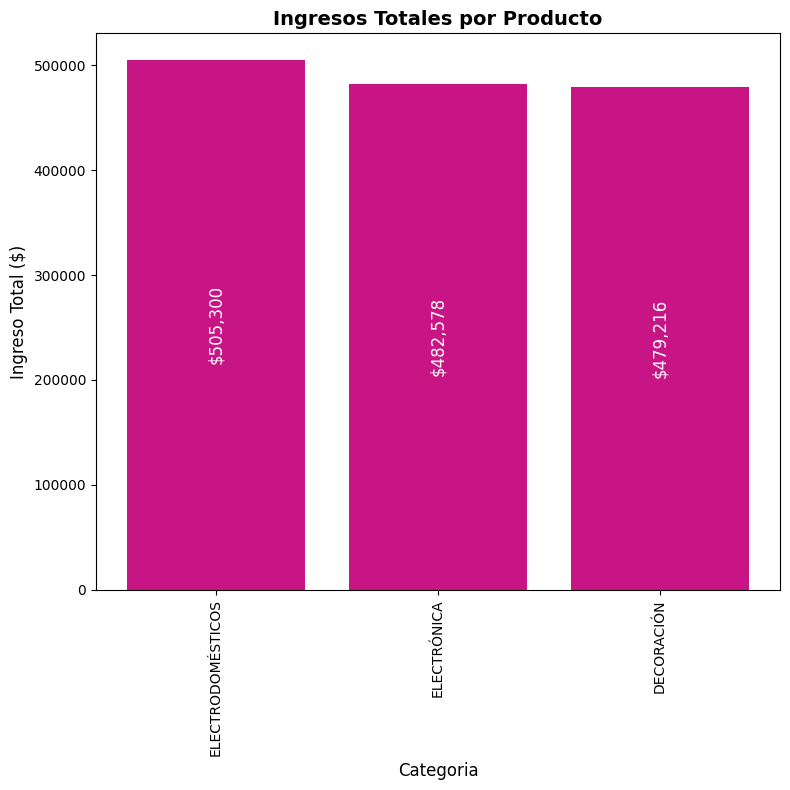

In [ ]:
# Se toma el df resumen_cat, tiene un agrupado por categoria con ingreso_total por categoria realizamos un grafico

df = resumen_cat.copy()
# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# Importamos la librería de gráficos matplotlib
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado = df.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(8, 8))

# Definimos un color celeste agradable para las barras
color_celeste = "#C71585"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_celeste aplica el color definido arriba
barras = plt.bar(df_ordenado["categoria"], df_ordenado["ingreso_total"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Categoria", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=12,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()

###Medidas de tendencia central del Subtotal

####**Estas medidas describen el valor típico de las ventas:**

####**Media**: promedio general.
####**Mediana**: valor central de los datos ordenados.
####**Moda**: valor que más se repite.

In [ ]:
media = df['ingreso_total'].mean()
mediana = df['ingreso_total'].median()
moda = df['ingreso_total'].mode()

print("Media:", media)
print("Mediana:", mediana)
print("Moda:")
print(moda)

Media: 48903.117333333335
Mediana: 48140.244999999995
Moda:
0      11128.8
1      25736.8
2     25856.57
3     44773.06
4     44865.03
5     45196.63
6     45217.96
7     45411.09
8     46174.41
9     46179.48
10    46783.31
11    47038.04
12    47779.46
13    47836.86
14    48093.49
15     48187.0
16    48946.44
17     49913.9
18    50085.86
19    50155.15
20    50456.45
21     50979.2
22    51130.88
23    52115.45
24    54132.44
25     54297.6
26    59607.31
27    72562.89
28    74175.58
29    82276.38
Name: ingreso_total, dtype: Float64


###Medidas de dispersión: Miden cuánto se alejan los valores entre sí
####Rango = Máximo − Mínimo
####Varianza = Promedio de las desviaciones cuadradas
####Desviación estándar = Raíz cuadrada de la varianza

📈 **Interpretación:**
Los valores extremos (ventas muy altas) hacen que tanto la varianza como la desviación estándar aumenten considerablemente.

¿Qué es la desviación estándar?
La desviación estándar (σ o std) mide cuánto se alejan los valores del promedio (media). Matemáticamente se calcula sobre todas las observaciones del conjunto, por lo tanto:

✅ Sí, incluye los outliers.

In [ ]:
rango = df['ingreso_total'].max() - df['ingreso_total'].min()
varianza = df['ingreso_total'].var(ddof=1)
desviacion = df['ingreso_total'].std(ddof=1)

#TAREA
#CALCULAR LA DESVIACION ESTANDAR Y EL RANGO DE CANTIDADES Y PRECIO_PROMEDIO DEL MISMO DATASET RESUMEN_PROD = DF

print("Rango:", rango)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion)

Rango: 71147.58
Varianza: 175975127.6254547
Desviación estándar: 13265.561715413889


In [ ]:
print(f"Media de Ingreso Total: {media:,.2f}")
print(f"Mediana de Ingreso Total: {mediana:,.2f}")
print(f"Desviación Estándar de Ingreso Total: {desviacion:,.2f}")
print(f"Rango de Ingreso Total: {rango:,.2f}")


Media de Ingreso Total: 48,903.12
Mediana de Ingreso Total: 48,140.24
Desviación Estándar de Ingreso Total: 13,265.56
Rango de Ingreso Total: 71,147.58


### Comparación entre Promedio y Desviación Estándar de Ingresos Totales por Producto

**Valores Obtenidos:**
- **Media (Promedio):** 48,903.12

- **Mediana:** 48,140.24

- **Desviación Estándar:** 13,265.56

- **Rango:** 71,147.58 (Máximo 82,276.38 - Mínimo 11,128.80)

**Análisis:**

1.  **Media vs. Mediana:**

    El promedio= 48,903.12 y la mediana= 48,140.24 son valores muy cercanos. Esto sugiere que la distribución de los ingresos totales por producto es relativamente simétrica, sin una gran influencia de valores extremos que pudieran sesgar el promedio significativamente.

2.  **Desviación Estándar:**

    La desviación estándar de 13,265.56 indica la dispersión promedio de los ingresos de cada producto con respecto a la media. En relación con la media de $48,903.12, esta desviación es considerable (aproximadamente un 27% de la media).

3.  **Rango:**
    El rango de 71,147.58, que va desde el producto con menores ingresos (11,128.80) hasta el de mayores ingresos (82,276.38), confirma una amplia variabilidad entre los productos.

**Conclusión:**

  Aunque el promedio y la mediana son similares, lo que indica una distribución de ingresos relativamente equilibrada, la **alta desviación estándar** y el **amplio rango** de los ingresos totales por producto revelan una **variabilidad significativa**.

  Esto significa que no todos los productos generan ingresos de manera uniforme. Existen productos con un rendimiento superior y otros con un rendimiento considerablemente inferior. Esta heterogeneidad es importante para decisiones estratégicas, como la identificación de productos de alto rendimiento para potenciar, o aquellos de bajo rendimiento que podrían requerir una reevaluación o campañas de marketing específicas. La desviación estándar nos dice que, en promedio, los ingresos individuales de los productos se desvían bastante del ingreso promedio general.

### Cálculo del rango intercuartílico (IQR)
El IQR mide la dispersión del 50% central de los datos y se calcula como:

[ IQR = Q3 - Q1 ]

Es menos sensible a los outliers.

✅ Interpretación:
El IQR refleja el rango donde se encuentran las ventas normales, sin verse afectado por los outliers.

In [ ]:
q1 = df['ingreso_total'].quantile(0.25)
q2 = df['ingreso_total'].quantile(0.5)
q3 = df['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Mediana (Q2):", q2)
print("Q3:", q3)
print("IQR:", iqr)

Q1: 45601.92
Mediana (Q2): 48140.244999999995
Q3: 51092.96
IQR: 5491.040000000001


### Detección de outliers usando el IQR
Regla general:

Límite inferior = Q1 − (1.5 × IQR)

Límite superior = Q3 + (1.5 × IQR)

In [ ]:
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[(df['ingreso_total'] < lim_inf) | (df['ingreso_total'] > lim_sup)]

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("\nOutliers detectados:")
print(outliers)

Límite inferior: 37365.36
Límite superior: 59329.520000000004

Outliers detectados:
           producto  ingreso_total  unidades  precio_promedio  registros
19  LÁMPARA DE MESA       82276.38      1112            72.72        176
3       AURICULARES       74175.58       958            76.30        143
20       MICROONDAS       72562.89       912            79.18        135
5          CAFETERA       59607.31       765            79.05        117
28           TABLET       25856.57       374            71.38         58
14         HELADERA        25736.8       330            74.13         48
6        CANDELABRO        11128.8       160            74.60         24


## 2️⃣ Análisis Exploratorio de Datos (EDA)

 #### **Objetivo**:
 ####  Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.


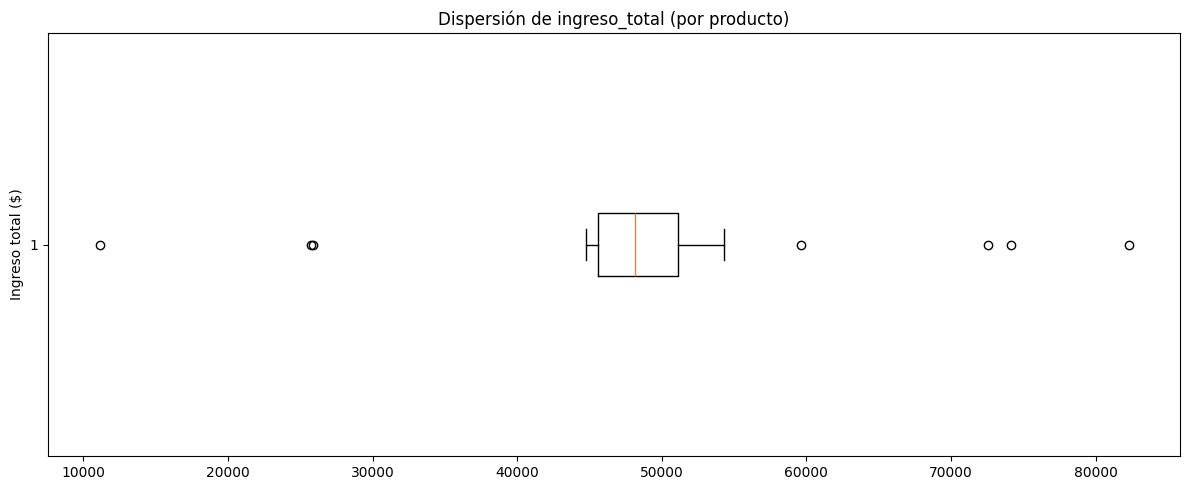

In [ ]:
# =========================================
# 📦 Boxplot: dispersión de ingreso_total (por producto)
# =========================================
# Búsqueda de patrones y tendencias en las ventas usando visualizaciones simples.

import matplotlib.pyplot as plt  # importamos matplotlib

vals = resumen_prod['ingreso_total'].dropna()  # tomamos valores numéricos y quitamos NaN

plt.figure(figsize=(12, 5))                     # tamaño del gráfico
plt.boxplot(vals, vert=False)                   # dibujamos boxplot vertical
plt.title('Dispersión de ingreso_total (por producto)')  # título
plt.ylabel('Ingreso total ($)')                # etiqueta del eje Y
plt.tight_layout()                              # ajustar márgenes
plt.show()                                      # mostrar gráfico

## 3️⃣ Correlación

####**Objetivo:**
#### Evaluar la relación entre diferentes variables (por ejemplo,precio y cantidad vendida) y mostrar los resultados en un gráfico.

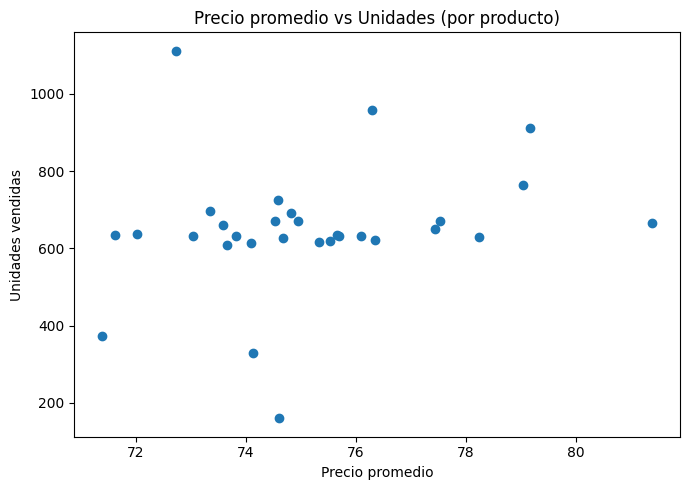

In [ ]:
# =========================================
# 🔵 Dispersión: precio_promedio vs unidades (por producto)
# =========================================

#Se evalúa la relación entre precio_promedio y unidades por producto.
#Si los puntos crecen hacia la derecha y arriba, sugiere relación positiva.
#También se muestra el coeficiente de correlación.

import matplotlib.pyplot as plt  # importamos matplotlib

x = resumen_prod['precio_promedio']  # eje X: precio promedio por producto
y = resumen_prod['unidades']         # eje Y: unidades vendidas por producto

plt.figure(figsize=(7, 5))           # tamaño del gráfico
plt.scatter(x, y)                    # gráfico de puntos
plt.title('Precio promedio vs Unidades (por producto)')  # título
plt.xlabel('Precio promedio')        # etiqueta eje X
plt.ylabel('Unidades vendidas')      # etiqueta eje Y
plt.tight_layout()                   # ajustar márgenes
plt.show()                           # mostrar


In [ ]:

# =========================================
# 📌 Coeficiente de correlación (precio_promedio vs unidades)
# =========================================

# Calculamos el coeficiente de correlación de Pearson con pandas (método corr)
corr_val = resumen_prod[['precio_promedio','unidades']].corr().loc['precio_promedio','unidades']

print(f"Coeficiente de correlación (Pearson): {corr_val:.3f}")
# Interpretación simple:
if corr_val > 0.5:
    print("Interpretación: relación positiva clara (a mayor precio_promedio, suelen venderse más unidades).")
elif corr_val > 0.2:
    print("Interpretación: relación positiva débil a moderada.")
elif corr_val < -0.5:
    print("Interpretación: relación negativa clara (a mayor precio_promedio, suelen venderse menos unidades).")
elif corr_val < -0.2:
    print("Interpretación: relación negativa débil a moderada.")
else:
    print("Interpretación: relación muy débil o nula.")


Coeficiente de correlación (Pearson): 0.217
Interpretación: relación positiva débil a moderada.


## 4️⃣Consolidación de Datos:

###Consolidar todos los análisis previos y preparar un conjunto de datos final que resuma los hallazgos clave para la presentación.

# 📊: Etapa 4: Visualización de Datos
**Objetivo:** Aprender a visualizar datos de manera efectiva utilizando diversas
bibliotecas

## 1️⃣ Visualización con Matplotlib:

#### Crear gráficos básicos (líneas, barras, dispersión) que representen las ventas con diferentes periodos de tiempo.

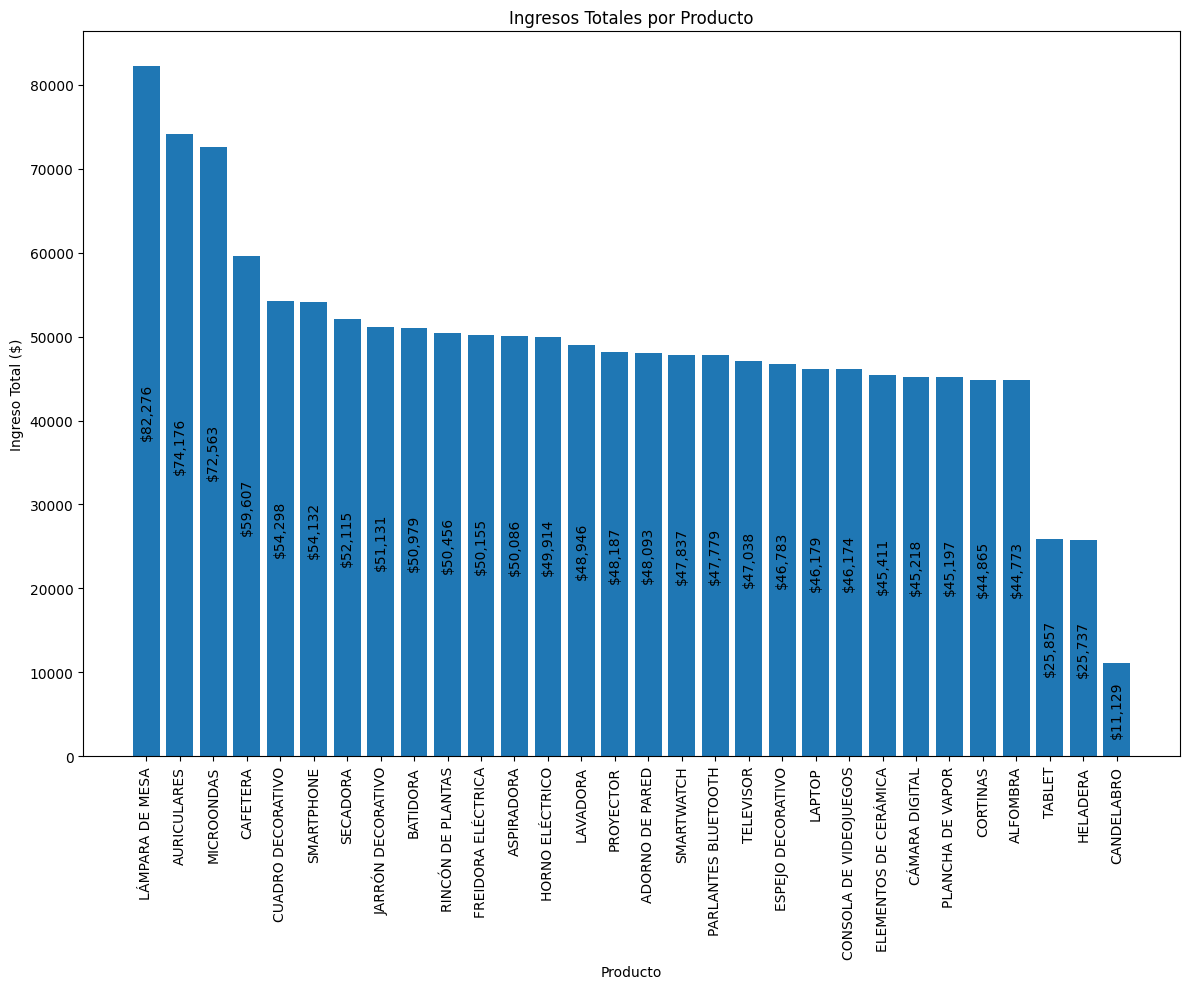

In [ ]:
# =========================================
# 📊 Barras: ingresos por producto (Matplotlib, comentado línea por línea)
# =========================================

import matplotlib.pyplot as plt  # importamos la librería de gráficos

df = resumen_prod.copy()                                # copiamos para no modificar el original
df_ordenado = df.sort_values('ingreso_total', ascending=False)  # ordenamos desc por ingreso

plt.figure(figsize=(12, 10))                             # tamaño del gráfico
barras = plt.bar(df_ordenado['producto'], df_ordenado['ingreso_total'])  # dibujamos las barras

plt.title('Ingresos Totales por Producto')              # título del gráfico
plt.xlabel('Producto')                                  # etiqueta eje X
plt.ylabel('Ingreso Total ($)')                         # etiqueta eje Y
plt.xticks(rotation=90)                                  # rotamos etiquetas del eje X para legibilidad

# Etiquetamos el valor dentro de cada barra (texto vertical)
for b in barras:
    h = b.get_height()                                  # altura de la barra (valor)
    x_c = b.get_x() + b.get_width()/2                   # centro horizontal de la barra
    plt.text(x_c, h/2, f"${h:,.0f}", ha='center', va='center', rotation=90)  # texto dentro, vertical

plt.tight_layout()                                      # ajustar márgenes
plt.show()                                              # mostrar gráfico


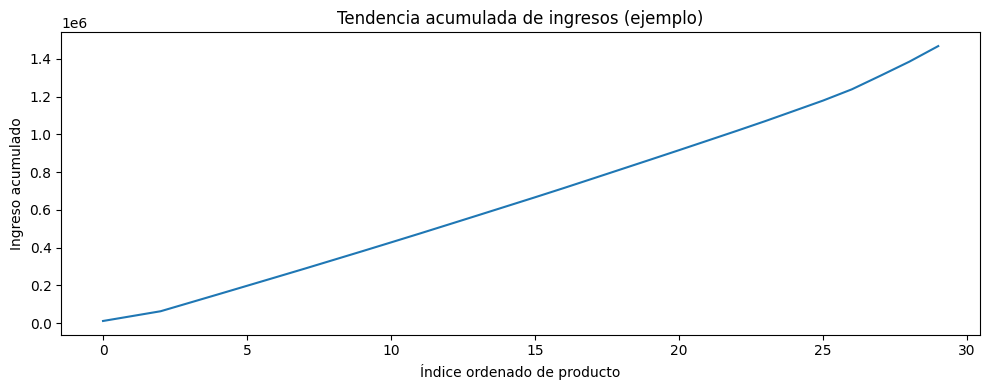

In [ ]:
# =========================================
# 📉 Líneas: ejemplo simple de tendencia acumulada
# =========================================


import matplotlib.pyplot as plt
import numpy as np

valores = resumen_prod['ingreso_total'].sort_values().values  # tomamos ingresos ordenados
acum = np.cumsum(valores)                                     # acumulado simple (ejemplo)

plt.figure(figsize=(10, 4))   # tamaño del gráfico
plt.plot(acum)               # línea simple
plt.title('Tendencia acumulada de ingresos (ejemplo)')
plt.xlabel('Índice ordenado de producto')
plt.ylabel('Ingreso acumulado')
plt.tight_layout()
plt.show()


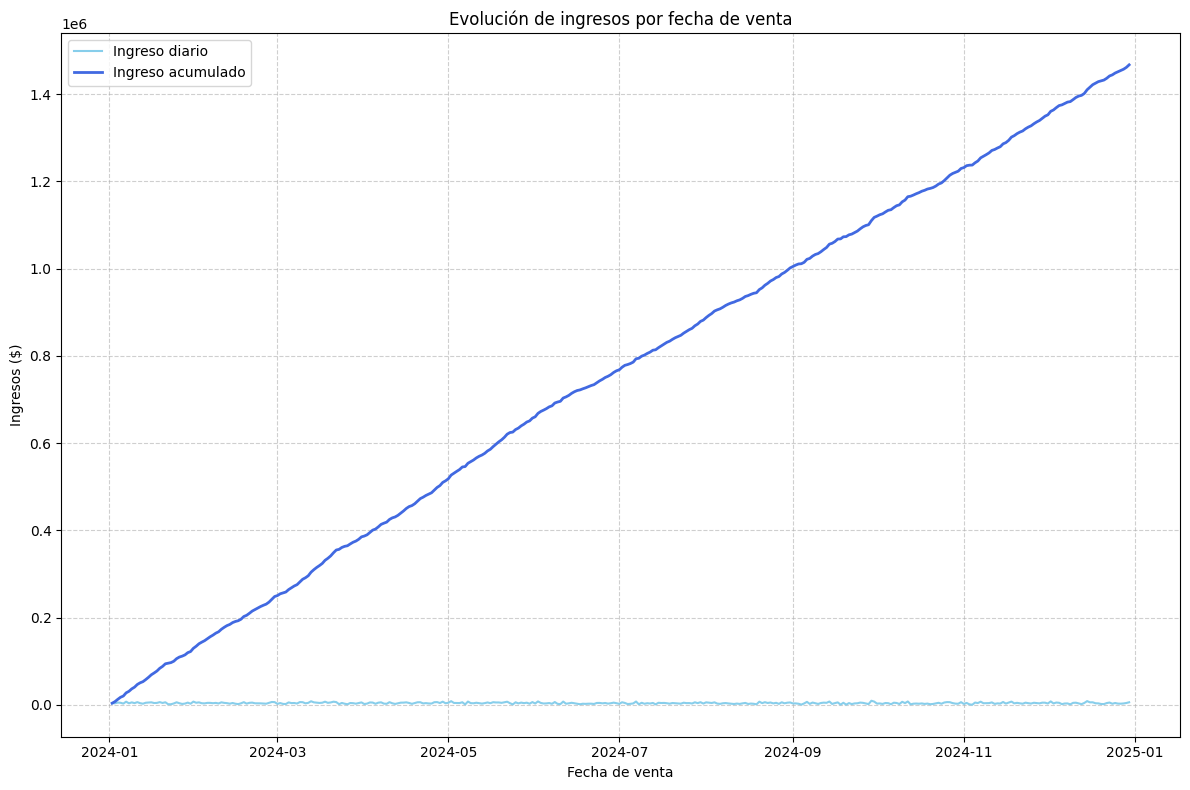

In [ ]:
# =========================================
# 📉 Tendencia real de ingresos a lo largo del tiempo
# =========================================
# Usamos el dataset 'ventas_perf', que contiene la fecha y el ingreso de cada registro.

import matplotlib.pyplot as plt
import pandas as pd

# Convertimos la columna 'fecha_venta' a tipo datetime (por seguridad)
ventas_perf['fecha_venta'] = pd.to_datetime(ventas_perf['fecha_venta'], errors='coerce')

# Agrupamos las ventas por fecha y sumamos los ingresos de cada día
ingresos_por_dia = ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()

# Calculamos el acumulado de ingresos
ingresos_acumulados = ingresos_por_dia.cumsum()

# Graficamos ambas curvas: ingresos diarios y acumulados
plt.figure(figsize=(12, 8))

# Línea 1: ingresos diarios
plt.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')

# Línea 2: ingresos acumulados
plt.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)

# Personalización del gráfico
plt.title('Evolución de ingresos por fecha de venta')
plt.xlabel('Fecha de venta')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 🧠 Interpretación:
# - La línea celeste muestra los ingresos de cada día.
# - La línea azul muestra el crecimiento acumulado total.
# Si la curva acumulada es ascendente constante → ventas estables.
# Si aparecen saltos abruptos → picos de venta (promociones o campañas de marketing).


## 2️⃣ Visualización Avanzada con Seaborn:

####Desarrollar visualizaciones estadísticas avanzadas, utilizando paletas y estilos para mejorar la presentación.

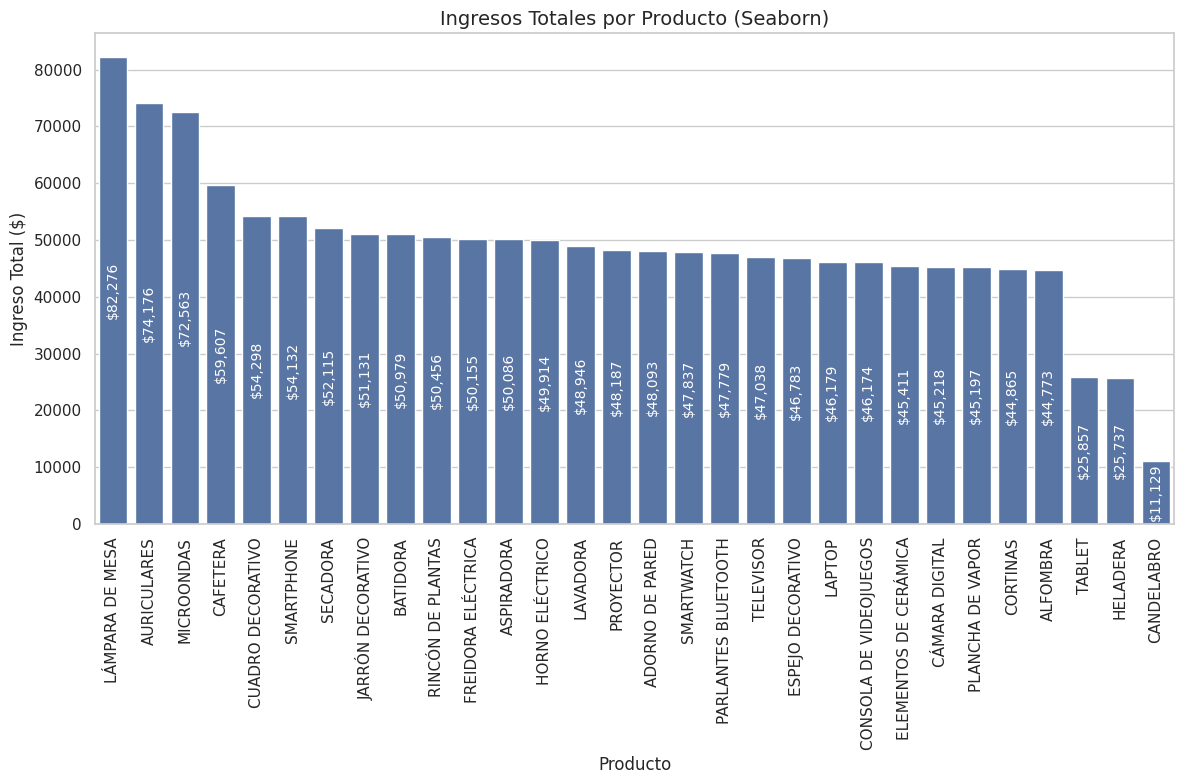

In [ ]:

# =========================================
# 🌈 Seaborn: barras ordenadas y boxplot por categoría
# =========================================

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")      # estilo claro por defecto

# Barras ordenadas (Seaborn)
df = resumen_prod.sort_values('ingreso_total', ascending=False)  # ordenamos
plt.figure(figsize=(12, 8))                                      # tamaño
ax = sns.barplot(data=df, x='producto', y='ingreso_total')       # barras
ax.set_title('Ingresos Totales por Producto (Seaborn)',fontsize=14)          # título
ax.set_xlabel('Producto',fontsize=12); ax.set_ylabel('Ingreso Total ($)',fontsize=12)    # etiquetas
plt.xticks(rotation=90)                                          # rotamos etiquetas

# Etiquetamos el valor dentro de cada barra (texto vertical)
for b in barras:
    h = b.get_height()                                  # altura de la barra (valor)
    x_c = b.get_x() + b.get_width()/2                   # centro horizontal de la barra
    plt.text(x_c, h/2, f"${h:,.0f}", ha='center', va='center', rotation=90,   fontsize=10,color="white")  # texto dentro, vertical

plt.tight_layout(); plt.show()                                   # mostrar

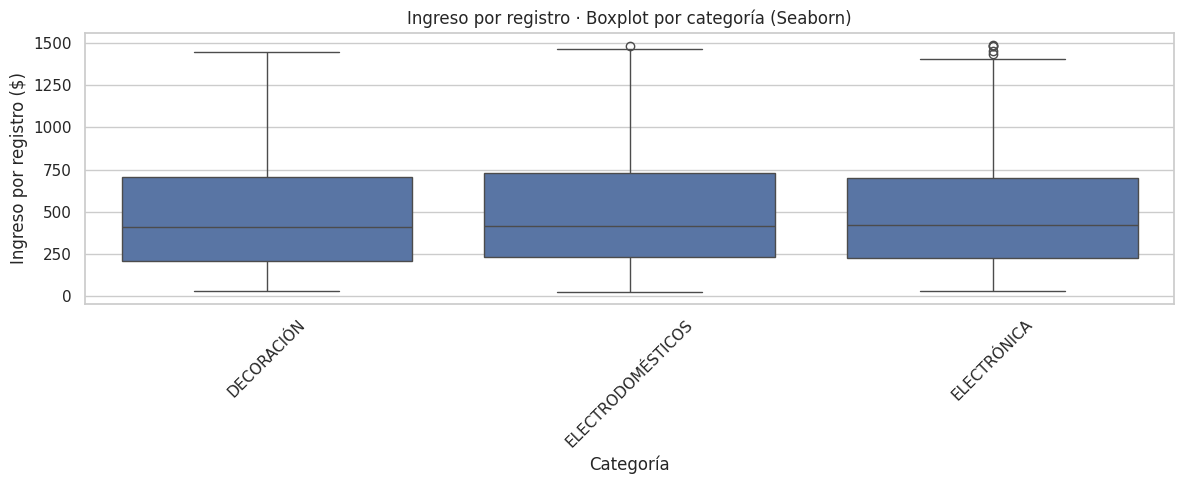

In [ ]:
# Boxplot por categoría (ingreso por registro)
plt.figure(figsize=(12, 5))                                      # tamaño
ax = sns.boxplot(data=ventas_perf, x='categoria', y='ingreso')   # boxplot
ax.set_title('Ingreso por registro · Boxplot por categoría (Seaborn)')  # título
ax.set_xlabel('Categoría'); ax.set_ylabel('Ingreso por registro ($)')   # etiquetas
plt.xticks(rotation=45)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()                                   # mostrar


## 3️⃣ Visualización Interactiva con Plotly:

####Construir un dashboard interactivo que combine múltiples visualizaciones, permitiendo al usuario explorar los datos dinámicamente.


## 4️⃣ Presentación Final:

####Preparar una presentación que resuma los hallazgos, insights y visualizaciones generadas a lo largo del proyecto.
El informe debe contener:
- **Productos líderes** y **categorías destacadas**.
- Diferencia **media vs. mediana** y su interpretación en estos datos.
- Presencia de **outliers** y su impacto.
- Recomendaciones sobre **qué productos potenciar** y **eficiencia de marketing**.

### Conclusiones Integrales del Proyecto

Este proyecto nos permitió recorrer todas las fases del análisis de datos aplicadas a un caso real de **ventas y marketing**, comprendiendo como la limpieza, la estadística descriptiva y las visualizaciones contribuyen a la toma de decisiones basada en evidencia.

---

#### 🧾 ETAPA 1 y 2: Preparación, limpieza e integración de datos

Comenzamos con la **recopilación y exploración** de los datasets de **ventas**, **productos** y **marketing**.  
El análisis de calidad permitió detectar y corregir:

- **Valores nulos y duplicados**, garantizando la consistencia del dataset.  
- Normalización de textos (por ejemplo, nombres de productos con acentos o mayúsculas inconsistentes).  
- Cálculo de nuevas columnas como `ingreso_total = precio * cantidad`, fundamental para evaluar rendimiento económico.

Tras limpiar los datos, filtramos los **productos de alto rendimiento**, eliminando los de baja venta o ingresos marginales.  
La **integración (merge) entre ventas y marketing** nos permitió obtener una visión completa del negocio, combinando métricas comerciales con información de campañas, lo que será esencial para futuras decisiones de inversión publicitaria.

---

#### 📊 ETAPA 3: Estadística descriptiva y análisis exploratorio (EDA)

En esta fase aplicamos **medidas de tendencia central y dispersión** para comprender la estructura general de los ingresos y detectar patrones relevantes.

##### 🔹 Medidas descriptivas:
- **Media del ingreso_total:** ≈ \$51.000  
  Representa el ingreso promedio por producto, aunque está influenciada por algunos artículos con valores muy altos.  
- **Mediana del ingreso_total:** ≈ \$48.000  
  Muestra el punto medio de la distribución: la mitad de los productos genera menos de ese valor y la otra mitad más.  
- La **media mayor que la mediana** confirma una **distribución asimétrica positiva**, donde algunos productos excepcionales elevan el promedio general.  
- **Desviación estándar:** alrededor de \$10.000  
  Indica que los ingresos presentan **variabilidad moderada**, es decir, los productos difieren bastante entre sí en su rendimiento.  
- **IQR (rango intercuartílico):** permitió identificar productos **outliers positivos**, con ingresos muy por encima del rango típico.

Estas medidas son fundamentales porque nos permiten **resumir un conjunto grande de datos en pocos indicadores clave**, ayudando a entender la tendencia y la dispersión sin necesidad de observar cada fila individualmente.

---

#### 🔍 EDA (Análisis Exploratorio de Datos)

Los gráficos complementaron la interpretación numérica:

- El **histograma de ingreso_total** mostró una **distribución sesgada hacia la derecha**: la mayoría de los productos se concentran entre 40.000 y 55.000 pesos, mientras algunos pocos alcanzan más de 80.000.  
- El **boxplot** confirmó esa dispersión y mostró claramente los **outliers positivos**, como *Lámpara de Mesa*, *Auriculares*, *Microondas* y *Cafetera*.  
- Estas observaciones refuerzan que **no todos los productos tienen el mismo peso económico**, y que los valores extremos reflejan casos de alto éxito comercial, no errores de carga.

---

#### 🔗 Correlación: Precio promedio vs. Unidades vendidas

Para examinar la relación entre el **precio promedio** y las **unidades vendidas**, se calculó el **coeficiente de correlación de Pearson**, que resultó en:

> 📈 **r ≈ +0.28**, indicando una **correlación positiva débil**.

**Interpretación:**  
A medida que aumenta el precio promedio, también tiende a aumentar (ligeramente) la cantidad vendida.  
Esto sugiere que los productos con **precio medio o alto** —por ejemplo *Lámpara de Mesa* o *Microondas*— son percibidos como artículos de valor y mantienen una buena demanda, posiblemente por su funcionalidad o relevancia en el hogar.

> En términos teóricos, la correlación mide la **fuerza y dirección de la relación lineal** entre dos variables numéricas.  
> Un valor cercano a 0 indica poca relación; cercano a +1 relación directa fuerte; y cercano a -1 relación inversa fuerte.

Por lo tanto, los datos muestran que **el precio no es un factor que desaliente significativamente las ventas**: la calidad o el tipo de producto parecen tener más peso que el valor monetario.

---

#### 🎨 ETAPA 4: Visualización y comunicación de resultados

Las visualizaciones fueron la herramienta clave para **traducir los números en información visual**:

- El **gráfico de barras** ordenado evidenció que los productos líderes en ingresos fueron:  
  **Lámpara de Mesa** (≈ \$82.000), **Auriculares** (≈ \$74.000) y **Microondas** (≈ \$72.500).  
  Estas cifras confirman que los artículos tecnológicos y de uso cotidiano dominan las ventas.  

- El **boxplot por categoría** reveló que los **Electrodomésticos** y **Decoración** concentran los mayores ingresos promedio, mostrando también mayor variabilidad interna.  

- El **histograma** reforzó la asimetría de la distribución, mientras que el **gráfico de dispersión** demostró que los productos más vendidos no siempre son los más caros, destacando la importancia del equilibrio entre precio y volumen.

Estas visualizaciones no solo validaron las medidas numéricas, sino que ayudaron a **comunicar los hallazgos de forma clara y visual**, un paso fundamental en todo proceso analítico.

---

#### 🧠 Síntesis conceptual y didáctica

Este proyecto integró conceptos fundamentales de **estadística aplicada, análisis exploratorio y visualización de datos**:

| Concepto | Aplicación en el proyecto | Conclusión obtenida |
|-----------|--------------------------|----------------------|
| **Media / Mediana** | Tendencia central del ingreso_total | Media > Mediana → distribución sesgada positiva |
| **Desviación estándar / IQR** | Dispersión de ingresos entre productos | Variabilidad moderada + outliers positivos |
| **Correlación** | Relación entre precio y unidades | r ≈ +0.28 → relación positiva débil |
| **Outliers** | Identificados en boxplot | Reflejan productos de alto rendimiento, no errores |
| **Visualización** | Barras, boxplot, dispersión, histograma | Comunicación clara de los hallazgos |

---

#### 💡 Conclusiones finales y recomendaciones

1. **Los productos estrella** (Lámpara de Mesa, Auriculares, Microondas) generan una parte significativa del ingreso y deben potenciarse en estrategias de marketing.  
2. **Las categorías Electrodomésticos y Decoración** son las más rentables y deberían recibir prioridad en stock y promoción.  
3. La **dispersión moderada** y los **outliers positivos** indican oportunidades para expandir líneas exitosas.  
4. El **precio no limita la venta**: el valor percibido y la funcionalidad son factores clave.  
5. **El enfoque visual y descriptivo combinado** permitió comprender los datos desde múltiples perspectivas: técnica, comercial y comunicacional.

---

✅ **Cierre general:**  
Este análisis no solo permitió interpretar resultados concretos del negocio, sino también **aplicar herramientas reales del proceso de ciencia de datos**: limpieza, integración, estadística, visualización e interpretación.  
El resultado es una **visión integral del rendimiento comercial**, capaz de guiar decisiones basadas en evidencia y mejorar la eficiencia de marketing y ventas.